In [1]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(9,6))

for ifo in ['H1']:
    # Read data and remove low frequency content
    l1 = Merger("GW170814").strain(ifo)
    l1 = highpass_fir(l1, 15, 8)

    # Calculate the noise spectrum
    psd = interpolate(welch(l1), 1.0 / l1.duration)

    # whiten
    white_strain = (l1.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove some of the high and low
    smooth = highpass_fir(white_strain, 20, 8)
    smooth = lowpass_fir(white_strain, 250, 8)*10**-23
    smooth = smooth[131072*10/30:131072*20/30]
    smooth_array =np.array(smooth)
    smooth_list = smooth_array.tolist()
    max_index = smooth_list.index(max(smooth_list))
    
    # time shift and flip L1
    if ifo == 'H1':
        smooth *= -1
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    pylab.plot(smooth.sample_times[max_index-50:max_index-31], smooth[max_index-50:max_index-31], label=ifo, color = 'darkorange')

pylab.legend(fontsize=15)
#pylab.xlim(1186741861.50, 1186741861.55)

pylab.ylim(0.5*-10**-21, 0.5*10**-21)
pylab.ylabel('Smoothed-Whitened Strain', fontsize=15)
pylab.grid()
pylab.xlabel('GPS Time (s)', fontsize=15)
pylab.show()

<Figure size 900x600 with 1 Axes>

(1, 2, 11)

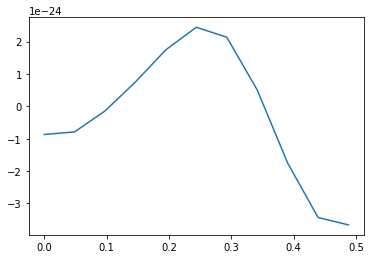

In [2]:
import numpy as np
array_smooth = np.array(smooth)
list_smooth = array_smooth.tolist()
max_index = list_smooth.index(max(array_smooth))

ttemp = np.array(smooth.sample_times[max_index-50:max_index-28]) - np.array(smooth.sample_times[max_index-50])
htemp = smooth[max_index-50:max_index-28]
t = []
h = []
X = []

for i in range(len(ttemp)/2):
    t.append(ttemp[2*i]*100)
for i in range(len(htemp)/2):
    h.append(htemp[2*i]/100)

X0 = []


X0.append([t,h])

plt.plot(t,h)
np.array(X0).shape

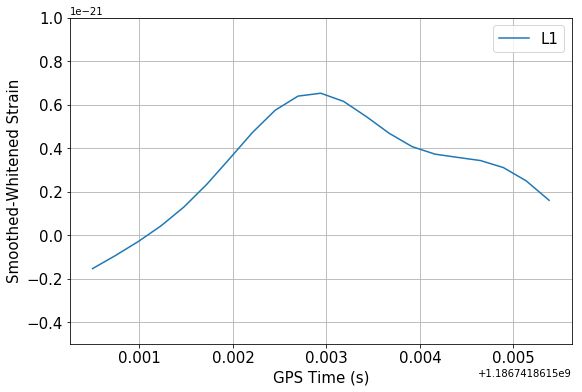

In [3]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(9,6))

for ifo in ['L1']:
    # Read data and remove low frequency content
    h1 = Merger("GW170814").strain(ifo)
    h1 = highpass_fir(h1, 15, 8)

    # Calculate the noise spectrum
    psd = interpolate(welch(h1), 1.0 / h1.duration)

    # whiten
    white_strain = (h1.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove some of the high and low
    smooth = highpass_fir(white_strain, 35, 8)
    smooth = lowpass_fir(white_strain, 300, 8)
    smooth = smooth[131072*10/30:131072*20/30]*10**-23
    smooth_array =np.array(smooth)
    smooth_list = smooth_array.tolist()
    max_index = smooth_list.index(max(smooth_list))
    
    # time shift and flip L1
    if ifo == 'H1':
        smooth *= -1
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    pylab.plot(smooth.sample_times[max_index-10:max_index+11], smooth[max_index-10:max_index+11], label=ifo)

pylab.legend(fontsize=15)
#pylab.xlim(1186741861.50, 1186741861.55)
pylab.ylim(0.5*-10**-21, 1*10**-21)
pylab.ylabel('Smoothed-Whitened Strain', fontsize=15)
pylab.grid()
pylab.xlabel('GPS Time (s)', fontsize=15)
pylab.show()

[1.18674186e+09 1.18674186e+09 1.18674186e+09 1.18674186e+09
 1.18674186e+09 1.18674186e+09 1.18674186e+09 1.18674186e+09
 1.18674186e+09 1.18674186e+09 1.18674186e+09]
[2.32917437e-22 3.50966498e-22 4.71087372e-22 5.74088655e-22
 6.39091085e-22 6.52389823e-22 6.14694191e-22 5.44498926e-22
 4.67837795e-22 4.06791753e-22 3.72283256e-22]
19851


(2, 2, 11)

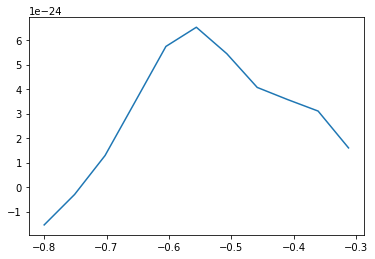

In [4]:
import numpy as np
array_smooth = np.array(smooth)
list_smooth = array_smooth.tolist()
max_index = list_smooth.index(max(array_smooth))
print(smooth.sample_times[max_index-5:max_index+6])
print(smooth[max_index-5:max_index+6])
#plt.plot(smooth.sample_times[max_index-5:max_index+6], smooth[max_index-5:max_index+6])
print(max_index)

ttemp = np.array(smooth.sample_times[max_index-10:max_index+12]) - np.array(smooth.sample_times[max_index-10])-0.008
htemp = smooth[max_index-10:max_index+12]
t = []
h = []

for i in range(len(ttemp)/2):
    t.append(ttemp[2*i]*100)
for i in range(len(htemp)/2):
    h.append(htemp[2*i]/100)



X0.append([t,h])
plt.plot(t,h)

np.array(X0).shape

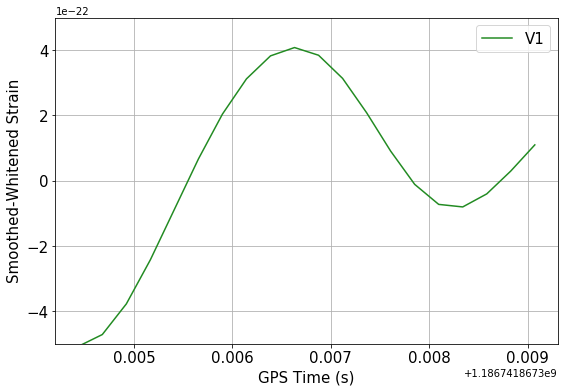

In [5]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(9,6))

for ifo in ['V1']:
    # Read data and remove low frequency content
    h1 = Merger("GW170814").strain(ifo)
    h1 = highpass_fir(h1, 15, 8)

    # Calculate the noise spectrum
    psd = interpolate(welch(h1), 1.0 / h1.duration)

    # whiten
    white_strain = (h1.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove some of the high and low
    smooth = highpass_fir(white_strain, 35, 8)
    smooth = lowpass_fir(white_strain, 300, 8)
    smooth = smooth[131072*10/30:131072*20/30]*10**-23
    smooth_array =np.array(smooth)
    smooth_list = smooth_array.tolist()
    max_index = smooth_list.index(max(smooth_list))
    
    # time shift and flip L1
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
pylab.plot(smooth.sample_times[max_index-85:max_index-65], smooth[max_index-85:max_index-65], label=ifo,color = 'forestgreen')

pylab.legend(fontsize=15)
#pylab.xlim(1186741861.50, 1186741861.55)
pylab.ylim(0.5*-10**-21, 0.5*10**-21)
pylab.ylabel('Smoothed-Whitened Strain', fontsize=15)
pylab.grid()
pylab.xlabel('GPS Time (s)', fontsize=15)
pylab.show()

(1, 3, 2, 11)


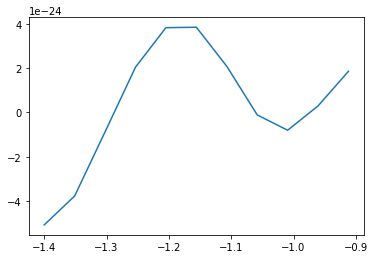

In [6]:
import numpy as np
array_smooth = np.array(smooth)
list_smooth = array_smooth.tolist()
max_index = list_smooth.index(max(array_smooth))

ttemp = np.array(smooth.sample_times[max_index-85:max_index-63]) - np.array(smooth.sample_times[max_index-85])-0.014
htemp = smooth[max_index-85:max_index-63]
t = []
h = []

for i in range(len(ttemp)/2):
    t.append(ttemp[2*i]*100)
for i in range(len(htemp)/2):
    h.append(htemp[2*i]/100)



X0.append([t,h])

X.append(X0)
X = np.array(X)
print(X.shape)
plt.plot(t,h)
np.save('X_injection_real.npy', X)


(array([-6.e-24, -4.e-24, -2.e-24,  0.e+00,  2.e-24,  4.e-24,  6.e-24]),
 <a list of 7 Text yticklabel objects>)

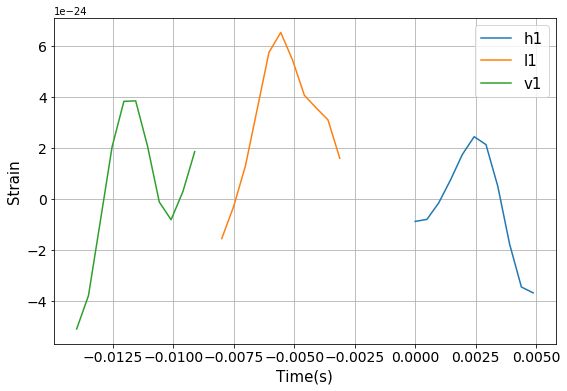

In [8]:
fig= plt.figure(figsize=(9,6))

plt.plot(X[0][0][0]/100,X[0][0][1], label = 'h1')
plt.plot(X[0][1][0]/100,X[0][1][1], label = 'l1')
plt.plot(X[0][2][0]/100,X[0][2][1], label = 'v1')
plt.legend(fontsize=15)
pylab.ylabel('Strain', fontsize=15)
pylab.grid()
pylab.xlabel('Time(s)', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


In [15]:
X[0][0]

array([[-5.37109375e-01, -4.88281250e-01, -4.39453125e-01,
        -3.90625000e-01, -3.41796875e-01, -2.92968750e-01,
        -2.44140625e-01, -1.95312500e-01, -1.46484375e-01,
        -9.76562500e-02, -4.88281250e-02],
       [-8.70247847e-25, -7.89171156e-25, -1.42303497e-25,
         7.55634179e-25,  1.75018968e-24,  2.44566225e-24,
         2.13682471e-24,  5.07820379e-25, -1.75333671e-24,
        -3.43646550e-24, -3.66562496e-24]])

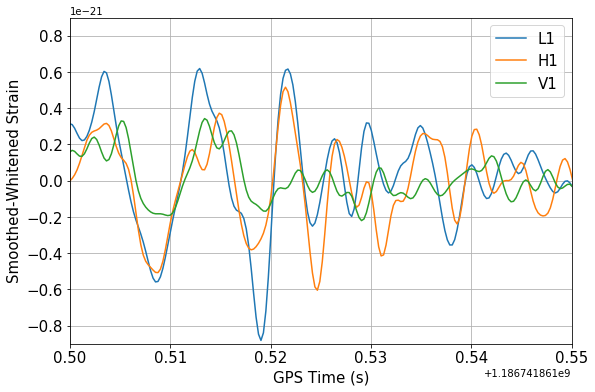

In [12]:
# from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(9,6))
for ifo in ['L1','H1','V1']:
    # Read data and remove low frequency content
    l1 = Merger("GW170814").strain(ifo)
    l1 = highpass_fir(l1, 15, 8)

    # Calculate the noise spectrum
    psd = interpolate(welch(l1), 1.0 / l1.duration)

    # whiten
    white_strain = (l1.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove some of the high and low
    smooth = highpass_fir(white_strain, 20, 8)
    smooth = lowpass_fir(white_strain, 250, 8)*10**-23

    # time shift and flip L1
    if ifo == 'H1':
        smooth *= -1
        smooth.roll(int(-.008 / smooth.delta_t))
    if ifo == 'V1':
        smooth.roll(int(-.014 / smooth.delta_t))
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    pylab.plot(smooth.sample_times, smooth, label=ifo)

pylab.legend(fontsize=15)
pylab.xlim(1186741861.50, 1186741861.55)

pylab.ylim(-90*10**-23, 90*10**-23)
pylab.ylabel('Smoothed-Whitened Strain', fontsize=15)
pylab.grid()
pylab.xlabel('GPS Time (s)', fontsize=15)
pylab.show()

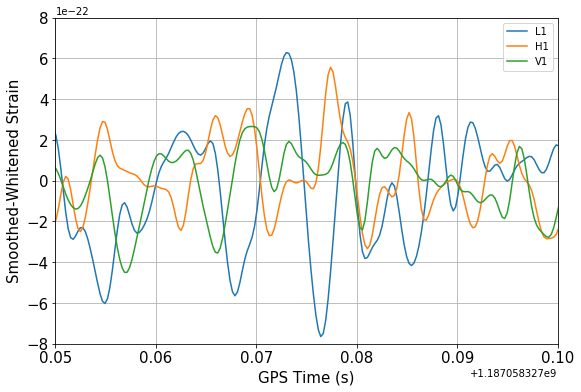

In [54]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(9,6))
for ifo in ['L1','H1','V1']:
    # Read data and remove low frequency content
    l1 = Merger("GW170818").strain(ifo)

    l1 = highpass_fir(l1, 15, 8)

    # Calculate the noise spectrum
    psd = interpolate(welch(l1), 1.0 / l1.duration)

    # whiten
    white_strain = (l1.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove some of the high and low
    smooth = highpass_fir(white_strain, 35, 8)
    smooth = lowpass_fir(white_strain, 300, 8)*10**-23

    # time shift and flip L1
    if ifo == 'H1':
        smooth *= -1
#        smooth.roll(int(-.008 / smooth.delta_t))
#    if ifo == 'V1':
#        smooth.roll(int(-.014 / smooth.delta_t))
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    pylab.plot(smooth.sample_times, smooth, label=ifo)

pylab.legend()
pylab.xlim(1187058327.05, 1187058327.10)
pylab.ylim(-80*10**-23, 80*10**-23)
pylab.ylabel('Smoothed-Whitened Strain', fontsize=15)
pylab.grid()
pylab.xlabel('GPS Time (s)', fontsize=15)
pylab.show()